In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Answer 1

In [88]:
# GENERATE DATA

def generate_dataset(sigma, n, m):
    X = np.random.randn(n, m)
    true_beta = np.random.randn(m + 1, 1)
    X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    Y = np.dot(X_with_intercept, true_beta) + np.random.normal(loc=0, scale=sigma, size=(n, 1))
    return X, Y, true_beta


#Answer 2

In [89]:
# LINEAR REGRESSION

def linear_regression_gradient_descent(X, Y, kappa, tau, lamda):
    m = X.shape[1]
    if X.shape[1] == m:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
    m = X.shape[1]
    beta = np.random.randn(m, 1)
    prev_cost = np.inf

    for epoch in range(kappa):
        Y_pred = np.dot(X, beta)
        error = Y_pred - Y
        gradient = np.dot(X.T, error)
        beta -= lamda * gradient
        cost = np.mean((error) ** 2)
        if abs(cost - prev_cost) < tau:
            break

        prev_cost = cost

    return beta, cost

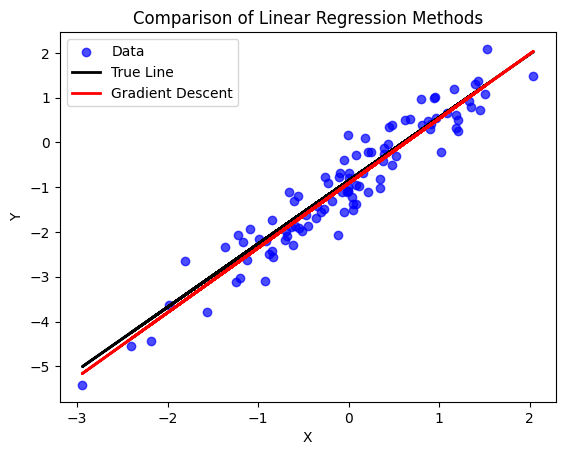

In [92]:
# Parameters
sigma = 0.4
n = 100
m = 1
kappa = 1000
tau = 1e-6
lamda = 0.0001

# Generate Data
X, Y, true_beta = generate_dataset(sigma, n, m)

# Apply Linear Regression
beta_gd, final_cost = linear_regression_gradient_descent(X, Y, kappa, tau, lamda)

# Scatter Plot Visualization
plt.scatter(X, Y, label='Data', color='blue', alpha=0.7)
plt.plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), true_beta), color='black', label='True Line', linewidth=2)
plt.plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), beta_gd), color='red', label='Gradient Descent', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Regression Methods')
plt.legend()
plt.show()

# Answer 3

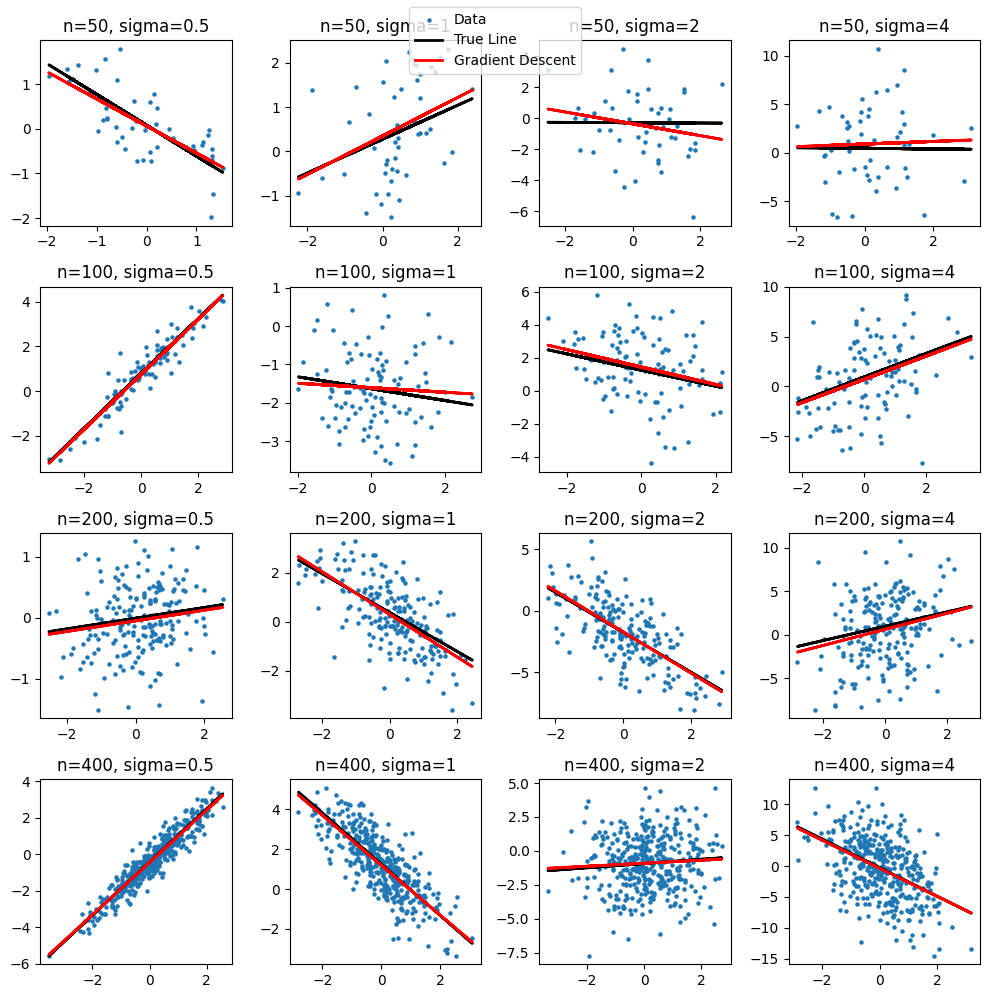

In [93]:
# Define values for dataset size (n) and noise level (sigma)
n_values = [50, 100, 200, 400]
sigma_values = [0.5, 1, 2, 4]

# Create subplots grid with specified dimensions
fig, axs = plt.subplots(len(n_values), len(sigma_values), figsize=(10, 10))

# Iterate over each combination of n and sigma
for i, n in enumerate(n_values):
    for j, sigma in enumerate(sigma_values):
        #Generate dataset and apply linear regression
        X, Y, true_beta = generate_dataset(sigma, n, m)
        beta_gd, final_cost = linear_regression_gradient_descent(X, Y, kappa,tau,lamda)

        # Scatter plot with true line and regression line
        axs[i, j].scatter(X, Y, label='Data', s=5)
        axs[i, j].plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), true_beta), color='black', label='True Line', linewidth=2)
        axs[i, j].plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), beta_gd), color='red', label='Gradient Descent', linewidth=2)

        # Set subplot title with n and sigma values
        axs[i, j].set_title(f'n={n}, sigma={sigma}')

# Add a common legend for all subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

# Adjust layout for better visualization and plot
plt.tight_layout()
plt.show()


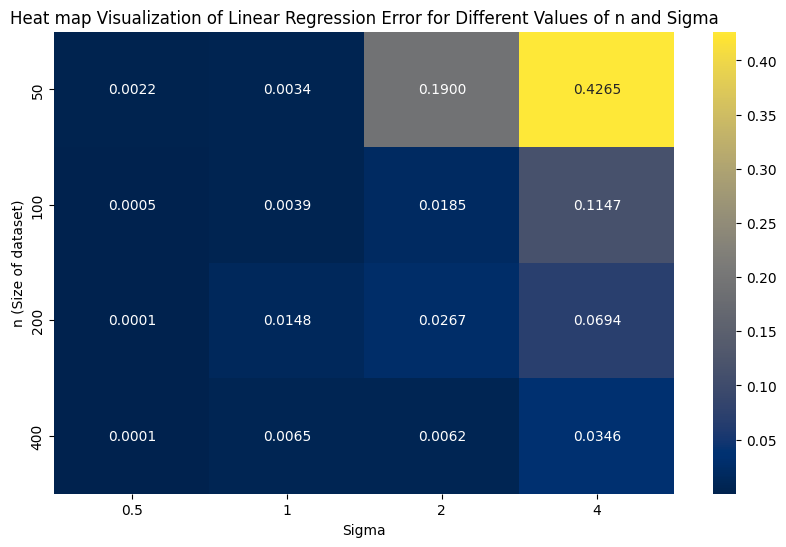

In [94]:
# HEAT MAP VISUALIZATION

n_values = [50, 100, 200, 400]
sigma_values = [0.5, 1, 2, 4]
errors = np.zeros((len(n_values), len(sigma_values)))

for i, n_val in enumerate(n_values):
    for j, sigma_val in enumerate(sigma_values):
        X_val, Y_val, true_beta_val = generate_dataset(sigma_val, n_val, m)
        beta_gd_val, final_cost_val = linear_regression_gradient_descent(X_val, Y_val, kappa, tau, lamda)
        error = np.mean((true_beta_val - beta_gd_val) ** 2)
        errors[i, j] = error

# Create a formatted heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(errors, annot=True, fmt=".4f", xticklabels=sigma_values, yticklabels=n_values, cmap='cividis')
plt.xlabel('Sigma')
plt.ylabel('n (Size of dataset)')
plt.title('Heat map Visualization of Linear Regression Error for Different Values of n and Sigma')
plt.show()


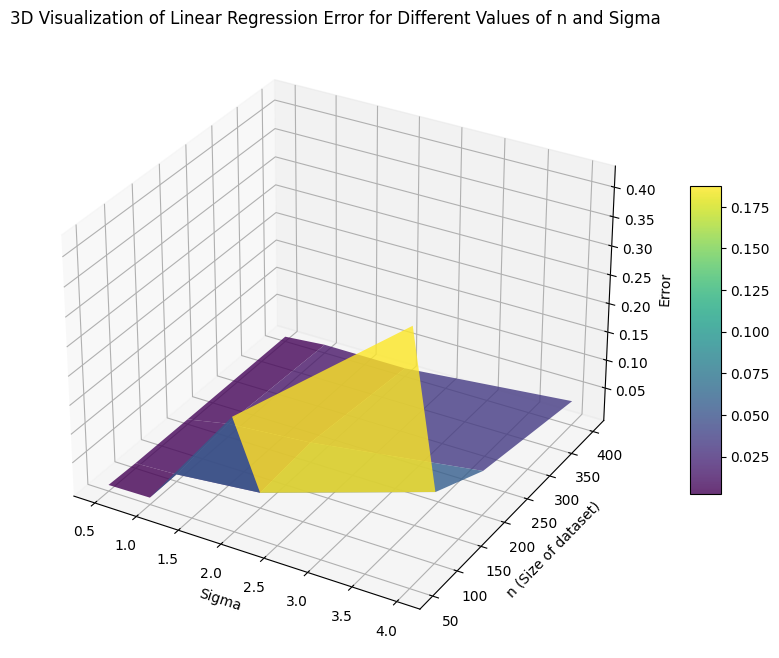

In [95]:
# 3D Visualization

from mpl_toolkits.mplot3d import Axes3D

# Create 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for n and sigma values
n_mesh, sigma_mesh = np.meshgrid(n_values, sigma_values)

# Plot the surface
surf = ax.plot_surface(sigma_mesh, n_mesh, errors.T, cmap='viridis', alpha=0.8)

# Add labels and title
ax.set_xlabel('Sigma')
ax.set_ylabel('n (Size of dataset)')
ax.set_zlabel('Error')
ax.set_title('3D Visualization of Linear Regression Error for Different Values of n and Sigma')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()
